#### load the graph dataset

In [111]:
from datasets import get_dataset

dataset_name = 'PROTEINS'
dataset_name = 'ENZYMES'
dataset = get_dataset(dataset_name,
                      sparse=True,
                      x_deg=True,
                      add_sl=1,
                      cleaned=False)
print(len(dataset))

600


In [112]:
g = dataset[100]
print(g)

Data(edge_index=[2, 221], x=[45, 3], y=[1])


In [113]:
g.edge_index

tensor([[ 0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,
          5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  9,  9,  9,
          9,  9,  9, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13,
         13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18,
         18, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22,
         23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27,
         27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31,
         31, 32, 32, 32, 32, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 36, 36, 36,
         36, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 40,
         41, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 44,  0,  1,  2,  3,
          4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
         22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
         40, 41, 42, 43, 44]

#### convert to networkx graph

In [114]:
import networkx as nx

In [115]:
gg = nx.Graph()

In [116]:
gg.add_nodes_from(range(g.x.size(0)))
gg.add_edges_from(zip(*g.edge_index.numpy().tolist()))

In [117]:
print(gg.number_of_nodes(), gg.number_of_edges())    # note that here edges of opposite directions are counted only once
print(gg.degree)

45 133
[(0, 5), (1, 6), (2, 6), (3, 5), (4, 5), (5, 7), (6, 6), (7, 6), (8, 5), (9, 8), (10, 5), (11, 7), (12, 6), (13, 6), (14, 5), (15, 5), (16, 7), (17, 6), (18, 5), (19, 6), (20, 8), (21, 6), (22, 5), (23, 5), (24, 6), (25, 5), (26, 9), (27, 6), (28, 5), (29, 6), (30, 8), (31, 5), (32, 6), (33, 5), (34, 6), (35, 5), (36, 6), (37, 5), (38, 7), (39, 6), (40, 7), (41, 6), (42, 5), (43, 5), (44, 6)]


#### plot the graph

In [118]:
import matplotlib.pyplot as plt

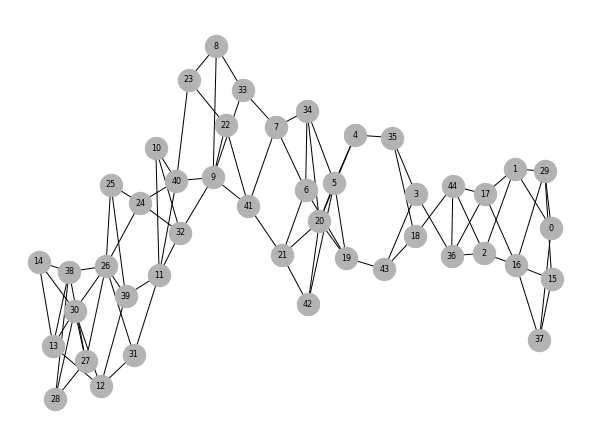

In [119]:
# gg = nx.ego_graph(gg, 7, 5)
pos = nx.kamada_kawai_layout(gg)
# pos = nx.spring_layout(gg)
plt.figure(figsize=(8, 6))
nx.draw(gg, pos, with_labels=True, node_size=500, node_color=[[.7, .7, .7]], font_size=8)

### put the plot pipeline into a function

In [136]:
from datasets import get_dataset
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(dataset_name, graph_id, node_size=500, with_labels=True):
    dataset = get_dataset(dataset_name,
                          sparse=True,
                          x_deg=True,
                          add_sl=1,
                          cleaned=False)
    print('Lenght of dataset:', len(dataset))
    
    g = dataset[graph_id]
    print('graph:', g)
    
    gg = nx.Graph()
    gg.add_nodes_from(range(g.x.size(0)))
    gg.add_edges_from(zip(*g.edge_index.numpy().tolist()))
    
    print('#nodes and edges:', gg.number_of_nodes(), gg.number_of_edges())    # note that here edges of opposite directions are counted only once
    print('node degrees:', gg.degree)
    
    pos = nx.kamada_kawai_layout(gg)
    # pos = nx.spring_layout(gg)
    plt.figure(figsize=(8, 6))
    nx.draw(gg, pos, with_labels=with_labels, node_size=node_size, node_color=[[.7, .7, .7]], font_size=8)
    plt.show()

Lenght of dataset: 1113
graph: Data(edge_index=[2, 84], x=[20, 3], y=[1])
#nodes and edges: 20 52
node degrees: [(0, 5), (1, 6), (2, 5), (3, 5), (4, 5), (5, 5), (6, 6), (7, 5), (8, 5), (9, 5), (10, 6), (11, 5), (12, 6), (13, 5), (14, 5), (15, 5), (16, 5), (17, 5), (18, 5), (19, 5)]


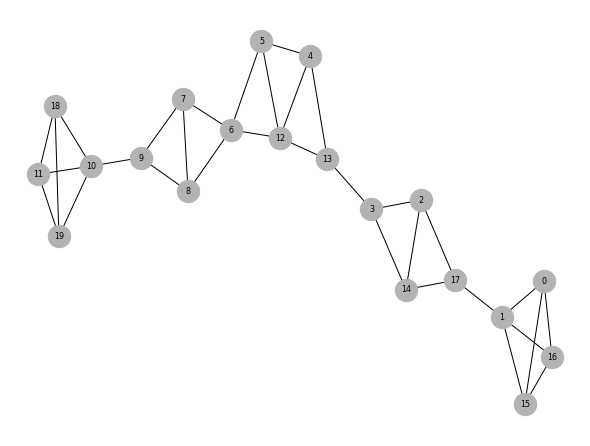

In [123]:
plot_graph('PROTEINS', 10)

Lenght of dataset: 4110
graph: Data(edge_index=[2, 86], x=[28, 37], y=[1])
#nodes and edges: 28 57
node degrees: [(0, 3), (1, 3), (2, 3), (3, 3), (4, 4), (5, 4), (6, 4), (7, 5), (8, 6), (9, 3), (10, 3), (11, 3), (12, 5), (13, 5), (14, 4), (15, 5), (16, 5), (17, 4), (18, 4), (19, 5), (20, 5), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (26, 4), (27, 4)]


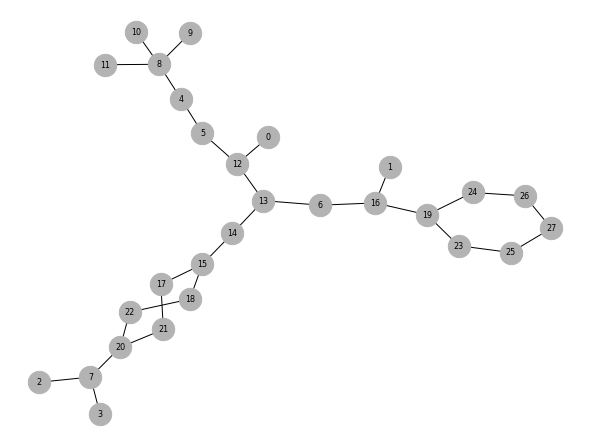

In [125]:
plot_graph('NCI1', 10)

Lenght of dataset: 188
graph: Data(edge_index=[2, 55], x=[17, 7], y=[1])
#nodes and edges: 17 36
node degrees: [(0, 4), (1, 4), (2, 4), (3, 5), (4, 5), (5, 4), (6, 4), (7, 4), (8, 5), (9, 5), (10, 4), (11, 4), (12, 5), (13, 4), (14, 5), (15, 3), (16, 3)]


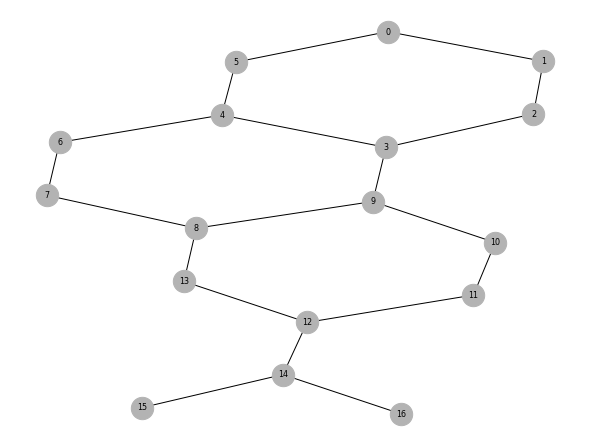

In [127]:
plot_graph('MUTAG', 0)

Lenght of dataset: 600
graph: Data(edge_index=[2, 16], x=[4, 3], y=[1])
#nodes and edges: 4 10
node degrees: [(0, 5), (1, 5), (2, 5), (3, 5)]


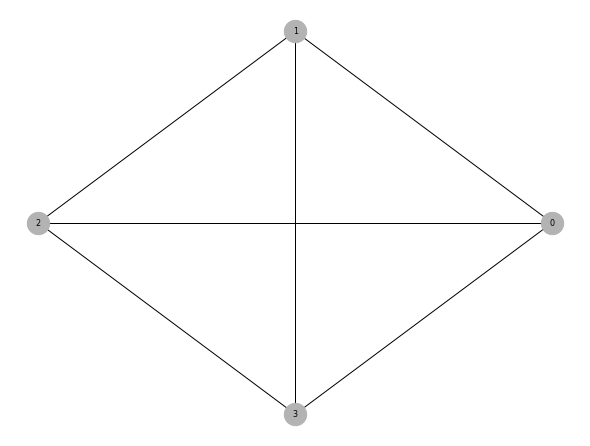

In [131]:
plot_graph('ENZYMES', 10)

Lenght of dataset: 1178
graph: Data(edge_index=[2, 1834], x=[312, 89], y=[1])
#nodes and edges: 312 1073
node degrees: [(0, 7), (1, 9), (2, 8), (3, 10), (4, 7), (5, 10), (6, 7), (7, 9), (8, 11), (9, 7), (10, 8), (11, 7), (12, 9), (13, 9), (14, 10), (15, 9), (16, 8), (17, 10), (18, 8), (19, 9), (20, 5), (21, 7), (22, 7), (23, 8), (24, 9), (25, 7), (26, 8), (27, 5), (28, 5), (29, 7), (30, 8), (31, 8), (32, 8), (33, 6), (34, 8), (35, 7), (36, 8), (37, 7), (38, 7), (39, 7), (40, 8), (41, 7), (42, 7), (43, 6), (44, 6), (45, 8), (46, 8), (47, 8), (48, 6), (49, 5), (50, 6), (51, 8), (52, 5), (53, 6), (54, 4), (55, 4), (56, 9), (57, 5), (58, 5), (59, 8), (60, 8), (61, 5), (62, 8), (63, 9), (64, 8), (65, 7), (66, 6), (67, 8), (68, 7), (69, 9), (70, 5), (71, 9), (72, 8), (73, 9), (74, 7), (75, 5), (76, 8), (77, 6), (78, 6), (79, 6), (80, 5), (81, 7), (82, 8), (83, 6), (84, 7), (85, 7), (86, 5), (87, 4), (88, 5), (89, 7), (90, 6), (91, 9), (92, 8), (93, 9), (94, 7), (95, 7), (96, 8), (97, 10), (9

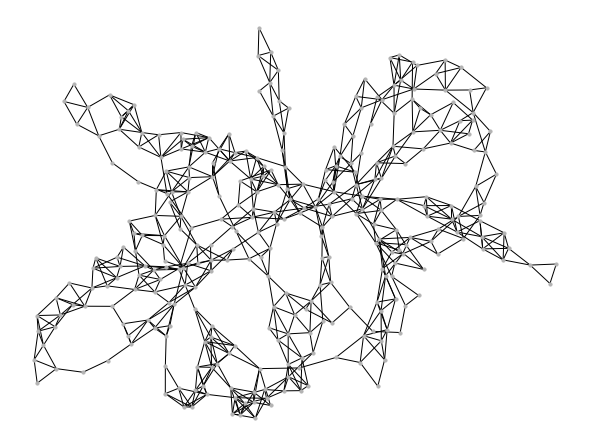

In [140]:
plot_graph('DD', 10, node_size=10, with_labels=False)